In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [3]:
data_cg1 = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=25.0_to_t=35.0_grid_32_more_obs_config1.npz')
data_cg2 = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=35.0_to_t=45.0_grid_32_more_obs_config1.npz')

In [4]:
ua_truth_t1 = data_cg1['ua_truth'] # t25 to t35
ua_truth_t2 = data_cg2['ua_truth'] # t35 to t45
Ta_truth_t1 = data_cg1['Ta_truth'] # t25 to t35
Ta_truth_t2 = data_cg2['Ta_truth'] # t35 to t45

In [5]:
ua_truth_t1.shape, ua_truth_t2.shape

((10, 84, 2), (11, 84, 2))

In [6]:
gridpoints = data_cg1['gridpoints']
print(f'gridpoints: {gridpoints}')

gridpoints: [[0.   0.25]
 [0.25 0.25]
 [0.5  0.25]
 [0.75 0.25]
 [1.   0.25]
 [1.25 0.25]
 [1.5  0.25]
 [1.75 0.25]
 [2.   0.25]
 [2.25 0.25]
 [2.5  0.25]
 [2.75 0.25]
 [3.   0.25]
 [3.25 0.25]
 [3.5  0.25]
 [3.75 0.25]
 [4.   0.25]
 [4.25 0.25]
 [4.5  0.25]
 [4.75 0.25]
 [5.   0.25]
 [5.25 0.25]
 [5.5  0.25]
 [5.75 0.25]
 [6.   0.25]
 [6.25 0.25]
 [6.5  0.25]
 [6.75 0.25]
 [0.   0.5 ]
 [0.25 0.5 ]
 [0.5  0.5 ]
 [0.75 0.5 ]
 [1.   0.5 ]
 [1.25 0.5 ]
 [1.5  0.5 ]
 [1.75 0.5 ]
 [2.   0.5 ]
 [2.25 0.5 ]
 [2.5  0.5 ]
 [2.75 0.5 ]
 [3.   0.5 ]
 [3.25 0.5 ]
 [3.5  0.5 ]
 [3.75 0.5 ]
 [4.   0.5 ]
 [4.25 0.5 ]
 [4.5  0.5 ]
 [4.75 0.5 ]
 [5.   0.5 ]
 [5.25 0.5 ]
 [5.5  0.5 ]
 [5.75 0.5 ]
 [6.   0.5 ]
 [6.25 0.5 ]
 [6.5  0.5 ]
 [6.75 0.5 ]
 [0.   0.75]
 [0.25 0.75]
 [0.5  0.75]
 [0.75 0.75]
 [1.   0.75]
 [1.25 0.75]
 [1.5  0.75]
 [1.75 0.75]
 [2.   0.75]
 [2.25 0.75]
 [2.5  0.75]
 [2.75 0.75]
 [3.   0.75]
 [3.25 0.75]
 [3.5  0.75]
 [3.75 0.75]
 [4.   0.75]
 [4.25 0.75]
 [4.5  0.75]
 [4.75 0.75]


In [7]:
ua_truth = np.concatenate((ua_truth_t1, ua_truth_t2), axis=0)
Ta_truth = np.concatenate((Ta_truth_t1, Ta_truth_t2), axis=0)

In [8]:
ua_truth.shape, Ta_truth.shape

((21, 84, 2), (21, 84))

In [9]:
n_tsteps = 21 
n_obs_points = gridpoints.shape[0]

In [10]:
def spread_bias_rmse_calc(n_tsteps, n_obs_points, n_stoch, var_level, ua_truth, Ta_truth):
    """
    returns absolute bias and spread for ux, uy and temp (ux_spread, 
    uy_spread, temp_spread, ux_abs_bias, uy_abs_bias, temp_abs_bias, ux_rmse, uy_rmse, temp_rmse )
    :param n_tsteps: number of time steps
    :param n_obs_points: observation points in the mesh
    :param n_stoch: number of particles in the ensemble
    :param var_level: variance level of the ensemble 
    """
    vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))
    vel_x_std_mat = np.zeros((n_tsteps,n_obs_points))

    vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
    vel_y_std_mat = np.zeros((n_tsteps,n_obs_points))

    temp_data_mean_mat = np.zeros((n_tsteps,n_obs_points))
    temp_data_std_mat = np.zeros((n_tsteps,n_obs_points))

    vel_x_rmse_mat = np.zeros((n_tsteps,n_obs_points))
    vel_y_rmse_mat = np.zeros((n_tsteps,n_obs_points))
    temp_rmse_mat = np.zeros((n_tsteps,n_obs_points))

    for l in range(n_obs_points):
        vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location
        vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch))
        temp_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location

        for k in range(n_stoch):
            data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_m_obs_particle_'+str(k+1)+'_var_'+str(var_level)+'_grid_32_t25_onwards_OU_same_ic.npz')

            vel_data_stoch = data_stoch['ua_data_sto']  
            vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
            vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

            temp_data_stoch = data_stoch['Ta_data_sto'] 
            temp_data_stoch_mat[:,k] = temp_data_stoch[:n_tsteps,l]


        vel_x_rmse = np.sqrt(np.mean(np.square(vel_x_data_stoch_mat - ua_truth[:n_tsteps,l,0].reshape((-1,1))), axis = 1, keepdims=True))
        vel_y_rmse = np.sqrt(np.mean(np.square(vel_y_data_stoch_mat - ua_truth[:n_tsteps,l,1].reshape((-1,1))), axis = 1, keepdims=True))
        temp_rmse = np.sqrt(np.mean(np.square(temp_data_stoch_mat - Ta_truth[:n_tsteps,l].reshape((-1,1))), axis = 1, keepdims=True))

        vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
        vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

        vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
        vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

        temp_data_mean = np.mean(temp_data_stoch_mat, axis = 1, keepdims=True)
        temp_data_std = np.std(temp_data_stoch_mat, axis = 1, keepdims=True)

        vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]
        vel_x_std_mat[:,l] = vel_x_data_std[:,0]

        vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]
        vel_y_std_mat[:,l] = vel_y_data_std[:,0]

        temp_data_mean_mat[:,l] = temp_data_mean[:,0]
        temp_data_std_mat[:,l] = temp_data_std[:,0]

        vel_x_rmse_mat[:,l] =  vel_x_rmse[:,0]
        vel_y_rmse_mat[:,l] =  vel_y_rmse[:,0]
        temp_rmse_mat[:,l] = temp_rmse[:,0]
        
    ux_spread = vel_x_std_mat
    uy_spread = vel_y_std_mat
    temp_spread = temp_data_std_mat

    ux_abs_bias = np.abs(vel_x_mean_mat - ua_truth[:n_tsteps,:,0])
    uy_abs_bias = np.abs(vel_y_mean_mat - ua_truth[:n_tsteps,:,1])
    temp_abs_bias = np.abs(temp_data_mean_mat - Ta_truth[:n_tsteps,:])

    ux_rmse = vel_x_rmse_mat
    uy_rmse = vel_y_rmse_mat
    temp_rmse = temp_rmse_mat

    return ux_spread, uy_spread, temp_spread, ux_abs_bias, uy_abs_bias, temp_abs_bias, ux_rmse, uy_rmse, temp_rmse

| Configuration | no. of particles | Variance level |
| :- | -: | :-: |
| 1 | 50 | 70
| 2 | 50 | 99
| 3 | 100 | 70
| 4 | 100 | 99

In [11]:
n_stoch_sim = [50, 100]
var_l = [70, 99]

In [12]:
data_config1 = spread_bias_rmse_calc(n_tsteps, n_obs_points, n_stoch_sim[0], var_l[0], ua_truth, Ta_truth)
data_config2 = spread_bias_rmse_calc(n_tsteps, n_obs_points, n_stoch_sim[0], var_l[1], ua_truth, Ta_truth)
data_config3 = spread_bias_rmse_calc(n_tsteps, n_obs_points, n_stoch_sim[1], var_l[0], ua_truth, Ta_truth)
data_config4 = spread_bias_rmse_calc(n_tsteps, n_obs_points, n_stoch_sim[1], var_l[1], ua_truth, Ta_truth)

# bias and RMSE at certain location on the grid

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

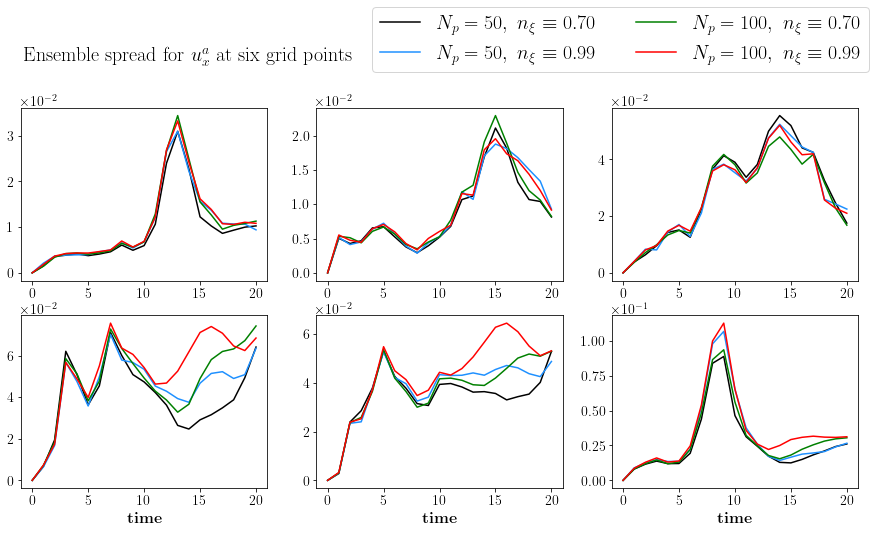

In [113]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
obs_p = [14, 42, 70, 50, 78, 64]
n = 0
c1 = 'black'
c2 = 'dodgerblue'
c3 = 'green'
c4 = 'red'
# c1 = 'c'
# c2 = 'b'
# c3 = 'g'
# c4 = 'm'
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(data_config1[0][:,obs_p[n]], color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config2[0][:,obs_p[n]], color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].plot(data_config3[0][:,obs_p[n]], color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config4[0][:,obs_p[n]], color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble spread for $u_x^a$ at six grid points', x = 0.28, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
# plt.savefig('../plots/ou_same_ic/uq_spread_cm_res_32_atm_ux_t25_onwards.pdf',bbox_inches='tight')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

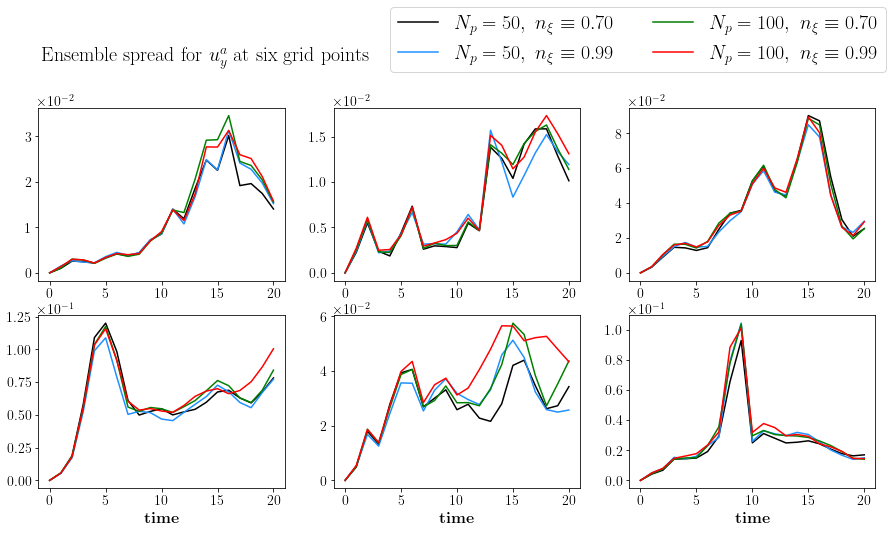

In [114]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(data_config1[1][:,obs_p[n]], color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config2[1][:,obs_p[n]], color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].plot(data_config3[1][:,obs_p[n]], color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config4[1][:,obs_p[n]], color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble spread for $u_y^a$ at six grid points', x = 0.28, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
# plt.savefig('../plots/ou_same_ic/uq_spread_cm_res_32_atm_uy_t25_onwards.pdf',bbox_inches='tight')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

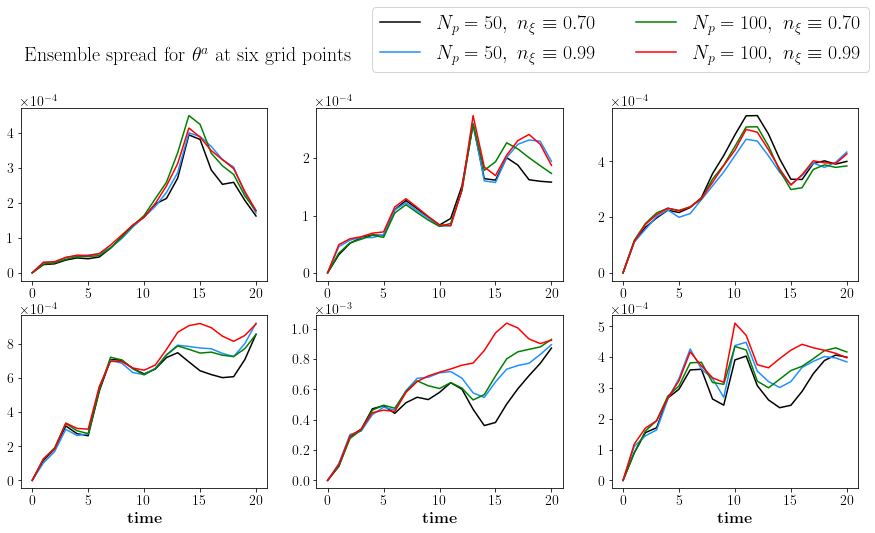

In [115]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
obs_p = [14, 42, 70, 50, 78, 64]
n = 0
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(data_config1[2][:,obs_p[n]], color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config2[2][:,obs_p[n]], color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].plot(data_config3[2][:,obs_p[n]], color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config4[2][:,obs_p[n]], color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble spread for $\theta^a$ at six grid points', x = 0.28, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
# plt.savefig('../plots/ou_same_ic/uq_spread_cm_res_32_atm_ux_t25_onwards.pdf',bbox_inches='tight')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

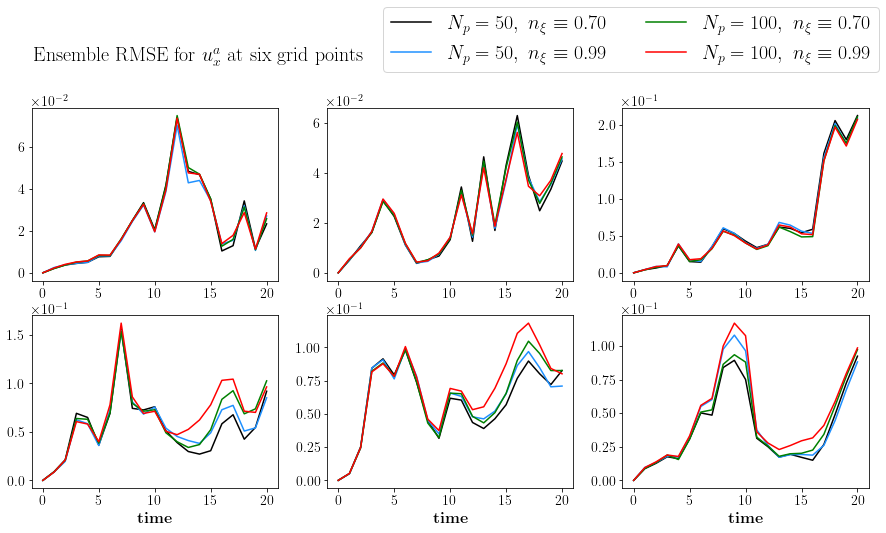

In [116]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(data_config1[6][:,obs_p[n]], color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config2[6][:,obs_p[n]], color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].plot(data_config3[6][:,obs_p[n]], color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config4[6][:,obs_p[n]], color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble RMSE for $u_x^a$ at six grid points', x = 0.28, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')


[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

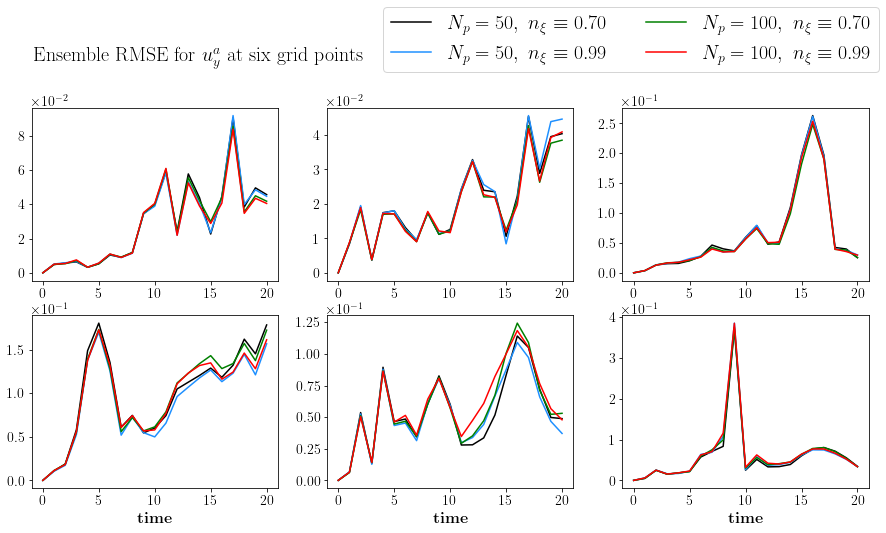

In [117]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(data_config1[7][:,obs_p[n]], color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config2[7][:,obs_p[n]], color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].plot(data_config3[7][:,obs_p[n]], color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config4[7][:,obs_p[n]], color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble RMSE for $u_y^a$ at six grid points', x = 0.28, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

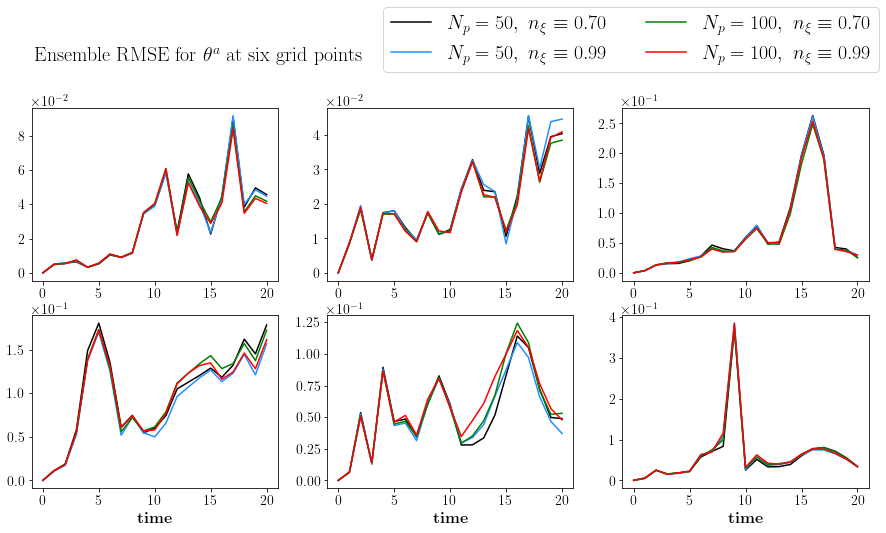

In [118]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(data_config1[7][:,obs_p[n]], color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config2[7][:,obs_p[n]], color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].plot(data_config3[7][:,obs_p[n]], color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
        ax[i,j].plot(data_config4[7][:,obs_p[n]], color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble RMSE for $\theta^a$ at six grid points', x = 0.28, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
# plt.savefig('../plots/ou_same_ic/uq_spread_cm_res_32_atm_ux_t25_onwards.pdf',bbox_inches='tight')

# Average of spread, bias, and RMSE over observation points

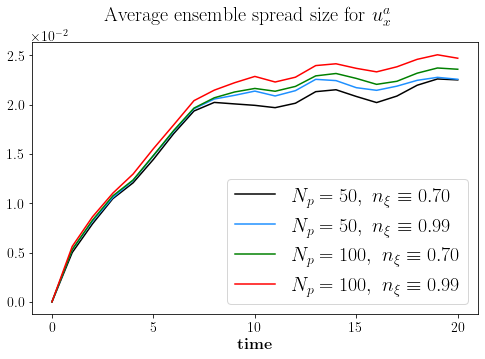

In [119]:
fig, ax = plt.subplots(1,figsize=(8, 5))

ax.plot(np.mean(data_config1[0], axis=1), color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config2[0], axis=1), color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
ax.plot(np.mean(data_config3[0], axis=1), color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config4[0], axis=1), color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) 
ax.legend()
fig.suptitle(r'Average ensemble spread size for $u_x^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/ou_same_ic/uq_avg_spread_ux_diff_config_t25_onwards_same_ic.pdf', bbox_inches='tight')

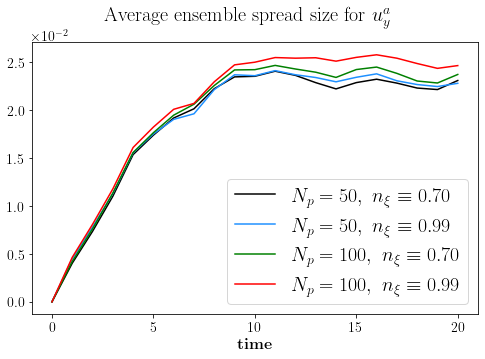

In [120]:
fig, ax = plt.subplots(1,figsize=(8, 5))
ax.plot(np.mean(data_config1[1], axis=1), color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config2[1], axis=1), color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
ax.plot(np.mean(data_config3[1], axis=1), color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config4[1], axis=1), color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) 
ax.legend()
fig.suptitle(r'Average ensemble spread size for $u_y^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/ou_same_ic/uq_avg_spread_uy_diff_config_t25_onwards_same_ic.pdf', bbox_inches='tight')

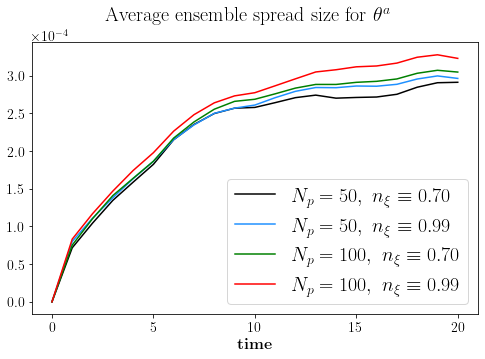

In [ ]:
fig, ax = plt.subplots(1,figsize=(8, 5))

ax.plot(np.mean(data_config1[2], axis=1), color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config2[2], axis=1), color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
ax.plot(np.mean(data_config3[2], axis=1), color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config4[2], axis=1), color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) 
ax.legend()
fig.suptitle(r'Average ensemble spread size for $\theta^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/ou_same_ic/uq_avg_spread_temp_diff_config_t25_onwards_same_ic.pdf', bbox_inches='tight')

In [122]:
# fig, ax = plt.subplots(1,figsize=(10, 6))

# ax.plot(np.mean(data_config1[3], axis=1), color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
# ax.plot(np.mean(data_config2[3], axis=1), color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
# ax.plot(np.mean(data_config3[3], axis=1), color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
# ax.plot(np.mean(data_config4[3], axis=1), color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')

# ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
# ax.set_xticks(np.arange(0,n_tsteps,5))

# ax.legend()
# fig.suptitle(r'\bf Average ensemble mean error for $u_x^a$ over all observation points')
# ax.set_xlabel(r'${ \bf time }$')

In [123]:
# fig, ax = plt.subplots(1,figsize=(10, 6))
# c1 = 'c'
# c2 = 'blue'
# c3 = 'g'
# c4 = 'm'

# ax.plot(np.mean(data_config1[4], axis=1), color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
# ax.plot(np.mean(data_config2[4], axis=1), color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
# ax.plot(np.mean(data_config3[4], axis=1), color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
# ax.plot(np.mean(data_config4[4], axis=1), color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')

# ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
# ax.set_xticks(np.arange(0,n_tsteps,5))

# ax.legend()
# fig.suptitle(r'\bf Average ensemble mean error for $u_y^a$ over all observation points')
# ax.set_xlabel(r'${ \bf time }$')

In [124]:
# fig, ax = plt.subplots(1,figsize=(10, 6))
# c1 = 'c'
# c2 = 'blue'
# c3 = 'g'
# c4 = 'm'

# ax.plot(np.mean(data_config1[5], axis=1), color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
# ax.plot(np.mean(data_config2[5], axis=1), color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
# ax.plot(np.mean(data_config3[5], axis=1), color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
# ax.plot(np.mean(data_config4[5], axis=1), color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')

# ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
# ax.set_xticks(np.arange(0,n_tsteps,5))

# ax.legend()
# fig.suptitle(r'\bf Average ensemble mean error for $\theta^a$ over all observation points')
# ax.set_xlabel(r'${ \bf time }$')

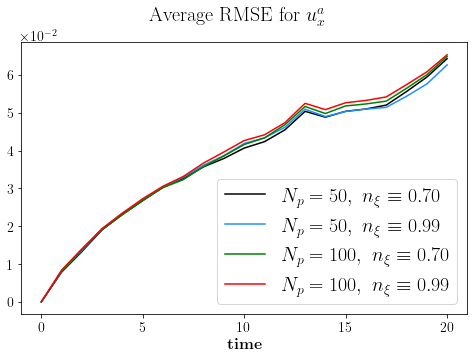

In [125]:
fig, ax = plt.subplots(1,figsize=(8, 5))

ax.plot(np.mean(data_config1[6], axis=1), color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config2[6], axis=1), color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
ax.plot(np.mean(data_config3[6], axis=1), color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config4[6], axis=1), color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')

ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))

ax.legend()
fig.suptitle(r'Average RMSE for $u_x^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/ou_same_ic/uq_avg_rmse_ux_diff_config_t25_onwards_same_ic.pdf', bbox_inches='tight')

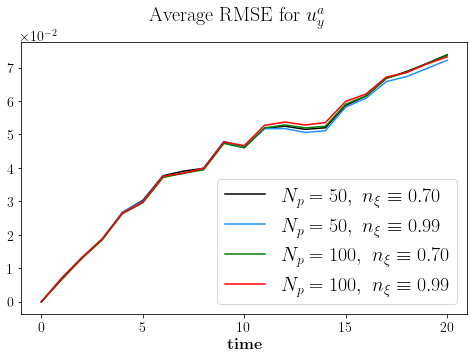

In [126]:
fig, ax = plt.subplots(1,figsize=(8, 5))

ax.plot(np.mean(data_config1[7], axis=1), color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config2[7], axis=1), color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
ax.plot(np.mean(data_config3[7], axis=1), color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config4[7], axis=1), color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')

ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))

ax.legend()
fig.suptitle(r'Average RMSE for $u_y^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/ou_same_ic/uq_avg_rmse_uy_diff_config_t25_onwards_same_ic.pdf', bbox_inches='tight')

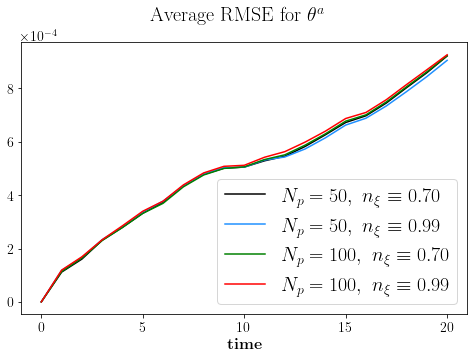

In [127]:
fig, ax = plt.subplots(1,figsize=(8, 5))

ax.plot(np.mean(data_config1[8], axis=1), color=c1, label=r'$N_p = 50, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config2[8], axis=1), color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
ax.plot(np.mean(data_config3[8], axis=1), color=c3, label=r'$N_p = 100, \ n_{\xi}\equiv 0.70$')
ax.plot(np.mean(data_config4[8], axis=1), color=c4, label=r'$N_p = 100, \ n_{\xi}\equiv 0.99$')

ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))

ax.legend()
fig.suptitle(r'Average RMSE for $\theta^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/ou_same_ic/uq_avg_rmse_temp_diff_config_t25_onwards_same_ic.pdf', bbox_inches='tight')